# ADALET VEYİS TURGUT
## Cmpe 484 Project 2

### helper

In [1]:
def print_matrix(matrix):
    for row in matrix:
        for el in row:
            print("%.2f" % el,end="\t")
        print()

# Question 1

### Part a

In [2]:
from Bio import SeqIO
import numpy as np
records = [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (NOV272020)/HCOV19-ENGLAND-271120-A.fasta", "fasta")]
nucleotide_matrix = np.array(records)

### Part b

In [3]:
def convert_nucleotide_matrix(nucleotide_matrix):
    for id,row in enumerate(nucleotide_matrix):
        for id2,elem in enumerate(row):
            if elem not in ['A','T','G','C']:
                nucleotide_matrix[id][id2] = "-"
    return nucleotide_matrix
nucleotide_matrix = convert_nucleotide_matrix(nucleotide_matrix)

### part c

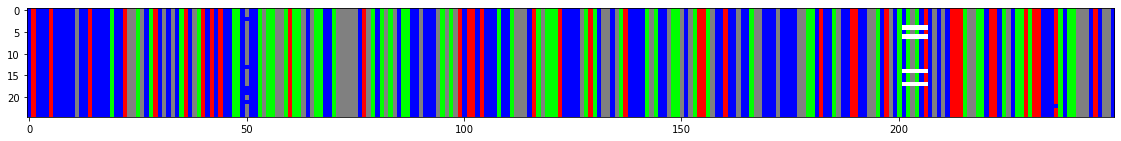

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

first_25_samples = np.array([a[:250] for a in nucleotide_matrix[:25]])
# convert strings to numbers
first_25_samples=np.where(first_25_samples =='A', 0,first_25_samples)
first_25_samples=np.where(first_25_samples =='T', 1,first_25_samples)
first_25_samples=np.where(first_25_samples =='G', 2,first_25_samples)
first_25_samples=np.where(first_25_samples =='C', 3,first_25_samples)
first_25_samples=np.where(first_25_samples =='-', 4,first_25_samples).astype('int8')
colors = ["lime", "blue", "red", "gray", "white"]
cmap = ListedColormap(colors)
plt.figure(figsize = (20,2))
plt.imshow(first_25_samples, vmin=0, vmax=len(cmap.colors), cmap=cmap)

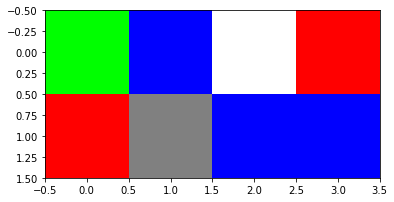

In [5]:
# just to show that coloring is consistent with appendix A
plt.imshow(np.array([[0,1,4,2],[2,3,1,1]]),vmin=0, vmax=len(cmap.colors), cmap=cmap)

### part d

* 50th nucleotid is different for some samples. Some of them 'C' and some of them 'T'.
* 235thish nucleotid of 22 or 23rd sample is different from others. It might be mutation.
* Finally, there are white horizantal lines after 200th nucleotids. They are highly visible mutations.

### part e

In [6]:
import math
entropy = 0
for elem in ['A','T','G','C']:
    for i in range(len(nucleotide_matrix[0])):
        col = nucleotide_matrix[:,i]
        count_of_col = np.sum(col != '-')
        prob = np.sum(col==elem) / count_of_col
        if prob == 0: continue
        entropy -= prob * math.log(prob,2)
entropy

15.041912414592813

# Question 2

### data prep

In [7]:
records = [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (NOV032020)/HCOV19-ENGLAND-031120-A.fasta", "fasta")][:4]
records += [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (NOV272020)/HCOV19-ENGLAND-271120-A.fasta", "fasta")][:4]
records += [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (DEC082020)/HCOV19-ENGLAND-081220-A.fasta", "fasta")][:4]
nucleotide_matrix = convert_nucleotide_matrix(np.array(records))

### Part a

1.00	0.87	0.87	0.91	0.88	0.93	0.93	0.93	0.88	0.86	0.88	0.93	
0.87	1.00	1.00	0.92	0.89	0.94	0.94	0.94	0.89	0.88	0.99	0.94	
0.87	1.00	1.00	0.92	0.89	0.94	0.94	0.94	0.89	0.88	0.99	0.94	
0.91	0.92	0.92	1.00	0.93	0.98	0.98	0.98	0.92	0.91	0.93	0.98	
0.88	0.89	0.89	0.93	1.00	0.95	0.95	0.95	1.00	0.88	0.90	0.95	
0.93	0.94	0.94	0.98	0.95	1.00	1.00	1.00	0.95	0.94	0.95	1.00	
0.93	0.94	0.94	0.98	0.95	1.00	1.00	1.00	0.95	0.94	0.95	1.00	
0.93	0.94	0.94	0.98	0.95	1.00	1.00	1.00	0.95	0.94	0.95	1.00	
0.88	0.89	0.89	0.92	1.00	0.95	0.95	0.95	1.00	0.88	0.90	0.95	
0.86	0.88	0.88	0.91	0.88	0.94	0.94	0.94	0.88	1.00	0.89	0.94	
0.88	0.99	0.99	0.93	0.90	0.95	0.95	0.95	0.90	0.89	1.00	0.95	
0.93	0.94	0.94	0.98	0.95	1.00	1.00	1.00	0.95	0.94	0.95	1.00	


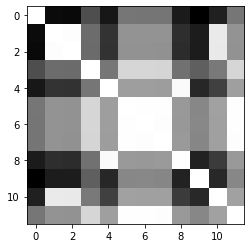

In [8]:
def calculate_pairwise_similarity_matrix(nucleotide_matrix):
    pairwise_similarity_matrix = []
    for i,row in enumerate(nucleotide_matrix):
        current_similarity = []
        for j,row2 in enumerate(nucleotide_matrix):
            same_count = 0
            for el1,el2 in zip(row,row2):
                if el1==el2:
                    same_count +=1
            current_similarity.append(same_count/len(row))
        pairwise_similarity_matrix.append(current_similarity)
    return pairwise_similarity_matrix
pairwise_similarity_matrix = calculate_pairwise_similarity_matrix(nucleotide_matrix)
print_matrix(pairwise_similarity_matrix)
plt.imshow(pairwise_similarity_matrix,cmap="gray")


### Part b

0.00	0.13	0.13	0.09	0.12	0.07	0.07	0.07	0.12	0.14	0.12	0.07	
0.13	0.00	0.00	0.08	0.11	0.06	0.06	0.06	0.11	0.12	0.01	0.06	
0.13	0.00	0.00	0.08	0.11	0.06	0.06	0.06	0.11	0.12	0.01	0.06	
0.09	0.08	0.08	0.00	0.07	0.02	0.02	0.02	0.08	0.09	0.07	0.02	
0.12	0.11	0.11	0.07	0.00	0.05	0.05	0.05	0.00	0.12	0.10	0.05	
0.07	0.06	0.06	0.02	0.05	0.00	0.00	0.00	0.05	0.06	0.05	0.00	
0.07	0.06	0.06	0.02	0.05	0.00	0.00	0.00	0.05	0.06	0.05	0.00	
0.07	0.06	0.06	0.02	0.05	0.00	0.00	0.00	0.05	0.06	0.05	0.00	
0.12	0.11	0.11	0.08	0.00	0.05	0.05	0.05	0.00	0.12	0.10	0.05	
0.14	0.12	0.12	0.09	0.12	0.06	0.06	0.06	0.12	0.00	0.11	0.06	
0.12	0.01	0.01	0.07	0.10	0.05	0.05	0.05	0.10	0.11	0.00	0.05	
0.07	0.06	0.06	0.02	0.05	0.00	0.00	0.00	0.05	0.06	0.05	0.00	


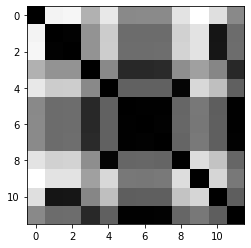

In [9]:
pairwise_distance_matrix = 1 - np.array(pairwise_similarity_matrix)
print_matrix(pairwise_distance_matrix)
plt.imshow(pairwise_distance_matrix,cmap="gray")

### Part c

In [10]:
branch_lengths = ["A{}".format(i+1) for i in range(len(pairwise_similarity_matrix))]
for _ in range(len(pairwise_similarity_matrix)-2):
    # calculate r'
    r_prime = [sum(row)/(len(pairwise_distance_matrix)-2) for row in pairwise_distance_matrix]
    # calculate d'
    d_prime = np.zeros(shape=(len(r_prime),len(r_prime)))
    for i,row in enumerate(pairwise_distance_matrix):
        for j,el in enumerate(row):
            if i>=j:
                d_prime[i][j] = math.inf
            else:
                d_prime[i][j] = pairwise_distance_matrix[i][j] - r_prime[i] - r_prime[j]
    # find mininum of d'
    min_row, min_col = np.argwhere(d_prime == np.min(d_prime))[-1]
    # calculate branch lengths
    v_i = (pairwise_distance_matrix[min_row][min_col] + r_prime[min_row]-r_prime[min_col])/2
    v_j = (pairwise_distance_matrix[min_row][min_col] + r_prime[min_col]-r_prime[min_row])/2
    # update branch lengths
    branch_lengths.append("({}:{},{}:{})".format(branch_lengths[min_row],v_i,branch_lengths[min_col],v_j))
    branch_lengths.pop(max(min_row,min_col))
    branch_lengths.pop(min(min_row,min_col))
    # construct new distance matrix
    new_distances_of_merged_clusters = [(pairwise_distance_matrix[min_row][k]+pairwise_distance_matrix[min_col][k]-pairwise_distance_matrix[min_row][min_col]) / 2 for k in range(len(pairwise_distance_matrix)) if k!=min_col and k!= min_row]
    pairwise_distance_matrix = np.delete(pairwise_distance_matrix,max(min_row,min_col),0)
    pairwise_distance_matrix = np.delete(pairwise_distance_matrix,min(min_row,min_col),0) 
    pairwise_distance_matrix = np.delete(pairwise_distance_matrix,max(min_row,min_col),1)
    pairwise_distance_matrix = np.delete(pairwise_distance_matrix,min(min_row,min_col),1)
    pairwise_distance_matrix = np.hstack([pairwise_distance_matrix,np.reshape(np.array(new_distances_of_merged_clusters),(len(new_distances_of_merged_clusters),1))])
    pairwise_distance_matrix = np.vstack([pairwise_distance_matrix,np.append(np.reshape(np.array(new_distances_of_merged_clusters),(len(new_distances_of_merged_clusters),1)),[0])])
#final_branch_length = "({}:{},{}:{}):{}".format(branch_lengths[0],(v_i+v_j)/2,branch_lengths[1],(v_i+v_j)/2,0)
final_branch_length = "({}:{},{}:{})".format(branch_lengths[0],(v_i+v_j)/2,branch_lengths[1],(v_i+v_j)/2)
print("Newick Tree:",final_branch_length,sep="\n")

Newick Tree:
(A6:0.00040779532967032866,(A8:0.0007604003139717718,((A12:0.0003985969387755089,((A11:0.0019050889586603864,(A2:0.00033432176289318466,A3:0.0009738938310367221):0.009083922030350619):0.047608145822431516,(A1:0.07130709426627793,(A5:0.00030088958660390297,A9:0.0025771847200418696):0.050095312850414866):0.0010574742717599922):0.0002555108581894167):9.198390894819917e-05,(A4:0.021589645473574056,(A7:0.00031724228152801154,A10:0.06352367870225013):0.00012673338566194028):7.563121402408019e-05):5.51903453688855e-05):0.00040779532967032866)


### Part d

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00040779532967032866, name='A6')
        Clade(branch_length=0.00040779532967032866)
            Clade(branch_length=0.0007604003139717718, name='A8')
            Clade(branch_length=5.51903453688855e-05)
                Clade(branch_length=7.563121402408019e-05)
                    Clade(branch_length=0.021589645473574056, name='A4')
                    Clade(branch_length=0.00012673338566194028)
                        Clade(branch_length=0.00031724228152801154, name='A7')
                        Clade(branch_length=0.06352367870225013, name='A10')
                Clade(branch_length=9.198390894819917e-05)
                    Clade(branch_length=0.0003985969387755089, name='A12')
                    Clade(branch_length=0.0002555108581894167)
                        Clade(branch_length=0.047608145822431516)
                            Clade(branch_length=0.0019050889586603864, name='A11')
                        

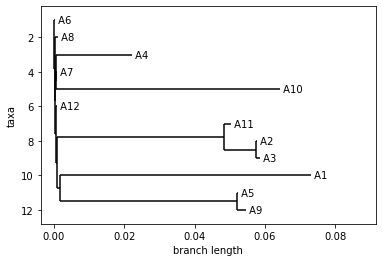

In [11]:
from Bio import Phylo
from io import StringIO
tree = Phylo.read(StringIO(final_branch_length), "newick")
tree.ladderize()
print(tree)
Phylo.draw(tree)

### Part e

Tree(rooted=False)
    Clade(branch_length=0, name='Inner10')
        Clade(name='A6')
        Clade(name='A8')
        Clade(name='Inner9')
            Clade(name='Inner8')
                Clade(name='A4')
                Clade(name='Inner6')
                    Clade(name='A10')
                    Clade(name='A7')
            Clade(name='Inner7')
                Clade(name='A12')
                Clade(name='Inner5')
                    Clade(name='Inner4')
                        Clade(name='A1')
                        Clade(name='Inner1')
                            Clade(name='A9')
                            Clade(name='A5')
                    Clade(name='Inner3')
                        Clade(name='A11')
                        Clade(name='Inner2')
                            Clade(name='A3')
                            Clade(name='A2')


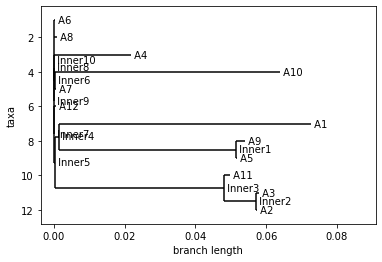

In [12]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor,DistanceMatrix
# first create distance matrix
dist_matrix = []
for i,row in enumerate(1 - np.array(pairwise_similarity_matrix)):
    dist_matrix.append(list(row[:i+1])) ## works only with python lists, convert np array to python built-in list
distance_matrix = DistanceMatrix(names=["A{}".format(i+1) for i in range(len(dist_matrix))],matrix=dist_matrix)
tree = DistanceTreeConstructor().nj(distance_matrix)
tree.ladderize()
print(tree)
Phylo.draw(tree)

Results from my implementation(2-c) and library implementation(2-e) are same.

### Part f

Tree(rooted=False)
    Clade(branch_length=0, name='Inner296')
        Clade(name='A271')
        Clade(name='A272')
        Clade(name='Inner295')
            Clade(name='A270')
            Clade(name='Inner294')
                Clade(name='A184')
                Clade(name='Inner293')
                    Clade(name='Inner289')
                        Clade(name='A73')
                        Clade(name='Inner143')
                            Clade(name='A187')
                            Clade(name='A81')
                    Clade(name='Inner292')
                        Clade(name='A186')
                        Clade(name='Inner291')
                            Clade(name='A138')
                            Clade(name='Inner290')
                                Clade(name='A82')
                                Clade(name='Inner288')
                                    Clade(name='A72')
                                    Clade(name='Inner287')
                                      

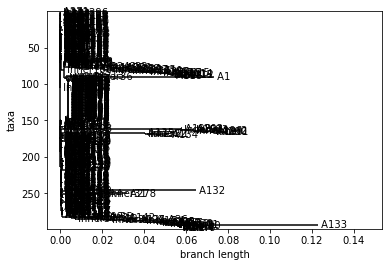

In [13]:
records = [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (NOV032020)/HCOV19-ENGLAND-031120-A.fasta", "fasta")]
records += [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (NOV272020)/HCOV19-ENGLAND-271120-A.fasta", "fasta")]
records += [x.seq[21563:25384+1] for x in SeqIO.parse("./UK Coronavirus Data/Coronavirus Samples/England (DEC082020)/HCOV19-ENGLAND-081220-A.fasta", "fasta")]
nucleotide_matrix = convert_nucleotide_matrix(np.array(records))
pairwise_similarity_matrix = calculate_pairwise_similarity_matrix(nucleotide_matrix)

# first create distance matrix
dist_matrix = []
for i,row in enumerate(1 - np.array(pairwise_similarity_matrix)):
    dist_matrix.append(list(row[:i+1])) ## works only with python lists, convert np array to python built-in list
distance_matrix = DistanceMatrix(names=["A{}".format(i+1) for i in range(len(dist_matrix))],matrix=dist_matrix)
tree = DistanceTreeConstructor().nj(distance_matrix)
tree.ladderize()
print(tree)
Phylo.draw(tree)